In [1]:
import matplotlib.pyplot as plt

from fitting import create_ensemble, load_data, create_datasets
from phase_space_reconstruction.utils import get_core_fraction
import torch

tkwargs = {"dtype": torch.float}
save_dir = "small_emittance_case"
quad_strengths, image_data, bins, xx = load_data()
train_dset = torch.load(save_dir + "/train.dset")
test_dset = torch.load(save_dir + "/test.dset")

bin_width = bins[1] - bins[0]
bandwidth = bin_width / 2
ensemble = create_ensemble(bins, bandwidth)

from torchensemble.utils import io
io.load(ensemble, save_dir)

ensemble.cuda();

gt_data = torch.load("synthetic_beam/ground_truth_dist.pt")
frac = 0.9
s = slice(0,4)
gt_core = get_core_fraction(gt_data,frac,s)


covs = []
for i in range(10):
    initial_beam = ensemble[i].beam().data
    re_core = get_core_fraction(initial_beam,frac,s)

    covs += [torch.cov(re_core.T)]

covs = torch.stack(covs)
covs.shape



C:\ProgramData\Miniconda3\envs\phase_space_reconstruction\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([10, 6, 6])

In [9]:
xemittances = torch.det(covs[3:,:2,:2]).sqrt()*1e6
yemittances = torch.det(covs[3:,2:4,2:4]).sqrt()*1e6
print(f"enx {xemittances.mean()} +/- {xemittances.std()}")
print(f"eny {yemittances.mean()} +/- {yemittances.std()}")

gt_data = torch.load("synthetic_beam/ground_truth_dist.pt")
gt_core = get_core_fraction(gt_data,frac,s)

gt_cov = torch.cov(gt_core.T)
print(torch.det(gt_cov[:2,:2]).sqrt()*1e6)
print(torch.det(gt_cov[2:4,2:4]).sqrt()*1e6)



enx 1.8777458667755127 +/- 0.026003234088420868
eny 7.349087238311768 +/- 0.17801104485988617
tensor(1.7821, dtype=torch.float64)
tensor(7.8309, dtype=torch.float64)


In [3]:
xemittances

tensor([1.8428e-06, 1.8709e-06, 1.8562e-06, 1.8691e-06, 1.8371e-06, 1.8645e-06,
        1.8983e-06, 1.8700e-06, 1.8880e-06, 1.9174e-06], device='cuda:0',
       grad_fn=<SqrtBackward0>)

In [4]:
yemittances

tensor([6.6179e-06, 6.9135e-06, 6.9571e-06, 7.1113e-06, 7.1688e-06, 7.2675e-06,
        7.4307e-06, 7.4307e-06, 7.4066e-06, 7.6280e-06], device='cuda:0',
       grad_fn=<SqrtBackward0>)

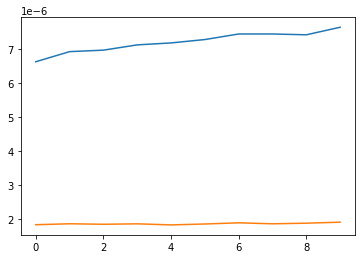

In [5]:
plt.plot(yemittances.cpu().detach())
plt.plot(xemittances.cpu().detach())

In [6]:
reconstruction_data = initial_beam.data




gt_cov = torch.cov(gt_core.T)
re_cov = torch.cov(re_core.T)

print(torch.det(gt_cov[:2,:2]).sqrt())
print(torch.det(re_cov[:2,:2]).sqrt())

print(torch.det(gt_cov[2:4,2:4]).sqrt())
print(torch.det(re_cov[2:4,2:4]).sqrt())

tensor(1.7821e-06, dtype=torch.float64)
tensor(1.9174e-06, device='cuda:0', grad_fn=<SqrtBackward0>)
tensor(7.8309e-06, dtype=torch.float64)
tensor(7.6280e-06, device='cuda:0', grad_fn=<SqrtBackward0>)


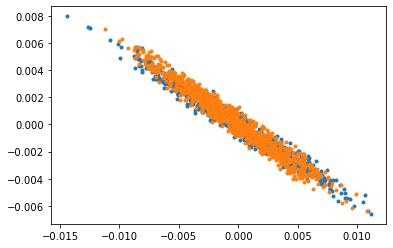

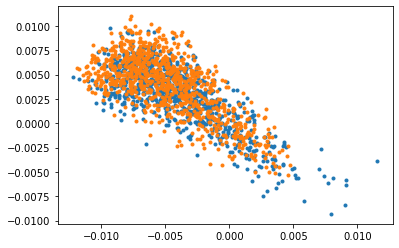

In [7]:
plt.plot(*gt_core.T[:2,::100].cpu().detach(), '.')
plt.plot(*re_core.T[:2,::100].cpu().detach(), '.')

plt.figure()
plt.plot(*gt_core.T[2:4,::100].cpu().detach(), '.')
plt.plot(*re_core.T[2:4,::100].cpu().detach(), '.')